In [13]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
adata = sc.read_h5ad('/home/glennrd/Documents/Research_Project/RNA-seq_Analysis/Data/1_GSE147319_adata_processed.h5ad')
adata_raw = sc.read_h5ad('/home/glennrd/Documents/Research_Project/RNA-seq_Analysis/Data/2_GSE147319_adata_raw.h5ad')

In [5]:

adata.var.head()

,n_cells,mean,frac_zeros,highly_variable
index,,,,
Mrpl15,23590,2.976025,0.171001,False
Lypla1,19330,1.385307,0.320706,False
Gm37988,164,0.005798,0.994237,False
Tcea1,15890,0.937243,0.441594,False
Atp6v1h,8002,0.345356,0.718794,False


In [53]:
adata.obs.head()

,percent_mito,percent_ribo,n_counts,n_genes,sample,S_score,G2M_score,phase,diet,groups_named_prog4,groups_named_regional,batch,groups_named_prog_eec,groups_named_regional_only,groups_named_regional_eec,groups_named_eec_final,n_mito_genes,n_counts_2,percent_mito_2
index,,,,,,,,,,,,,,,,,,,
AAACCTGAGAGTAAGG-1-CD_1,0.063233,0.368494,18155.0,3799,CD_1,-0.080579,0.620023,G2M,CD,Enterocyte progenitor,Enterocyte progenitor (distal),batch1,Enterocyte progenitor,distal,Enterocyte progenitor (distal),Enterocyte progenitor,3.871201,4344.297852,0.000891
AAACCTGAGGTGATTA-1-CD_1,0.028060,0.322381,16465.0,3403,CD_1,-0.230385,-0.253758,G1,CD,Goblet cell,Goblet cell (proximal),batch1,Goblet cell,proximal,Goblet cell (proximal),Goblet cell,5.375278,3927.603271,0.001369
AAACCTGCAAGTAGTA-1-CD_1,0.016216,0.178378,10360.0,3442,CD_1,-0.189605,-0.239996,G1,CD,EEC,EEC,batch1,EEC,other,EEC,EC,6.356108,3631.664307,0.001750
AAACCTGCACACCGAC-1-CD_1,0.031619,0.285016,24953.0,4622,CD_1,0.023191,0.388003,G2M,CD,Enterocyte progenitor,Enterocyte progenitor (proximal),batch1,Enterocyte progenitor,proximal,Enterocyte progenitor (proximal),Enterocyte progenitor,6.068426,5854.532227,0.001037
AAACCTGGTACACCGC-1-CD_1,0.041818,0.397482,4687.0,1647,CD_1,0.089725,-0.042428,S,CD,Goblet cell,Goblet cell (distal),batch1,Goblet cell,distal,Goblet cell (distal),Goblet cell,2.079442,1643.058105,0.001266


In [77]:
# List the names of each mitchondrial gene in adata.var_names
mito_genes = [name for name in adata.var_names if name.startswith('mt-')]
mito_genes

['mt-Nd1',
 'mt-Nd2',
 'mt-Co1',
 'mt-Co2',
 'mt-Atp8',
 'mt-Atp6',
 'mt-Co3',
 'mt-Nd3',
 'mt-Nd4l',
 'mt-Nd4',
 'mt-Nd5',
 'mt-Nd6',
 'mt-Cytb']

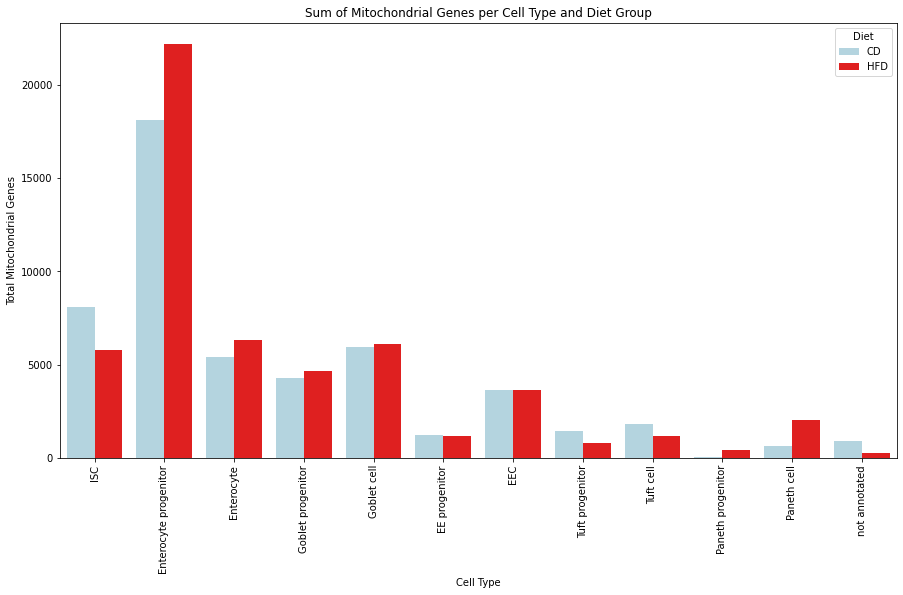

In [93]:
mito_genes = [name for name in adata.var_names if name.startswith('mt-')]
mt_gene_index = np.where(mito_genes)[0]
adata.obs['n_mito_genes'] = adata[:, mt_gene_index].X.sum(axis=1)
adata.obs['n_counts_2'] = adata.X.sum(axis=1)
adata.obs['percent_mito_2'] = adata[:, mt_gene_index].X.sum(axis=1) / adata.X.sum(axis=1)

# Sum the column n_mito_genes for each cell type and each diet group
mt_percell_perdiet = adata.obs.groupby(['groups_named_prog4', 'diet']).agg({'n_mito_genes': 'sum'})


mt_percell_perdiet = mt_percell_perdiet.reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(x='groups_named_prog4', y='n_mito_genes', hue='diet', data=mt_percell_perdiet, palette={'CD': 'lightblue', 'HFD': 'red'})
plt.title('Sum of Mitochondrial Genes per Cell Type and Diet Group')
plt.xlabel('Cell Type')
plt.ylabel('Total Mitochondrial Genes')
plt.xticks(rotation=90)
plt.legend(title='Diet')
plt.show()

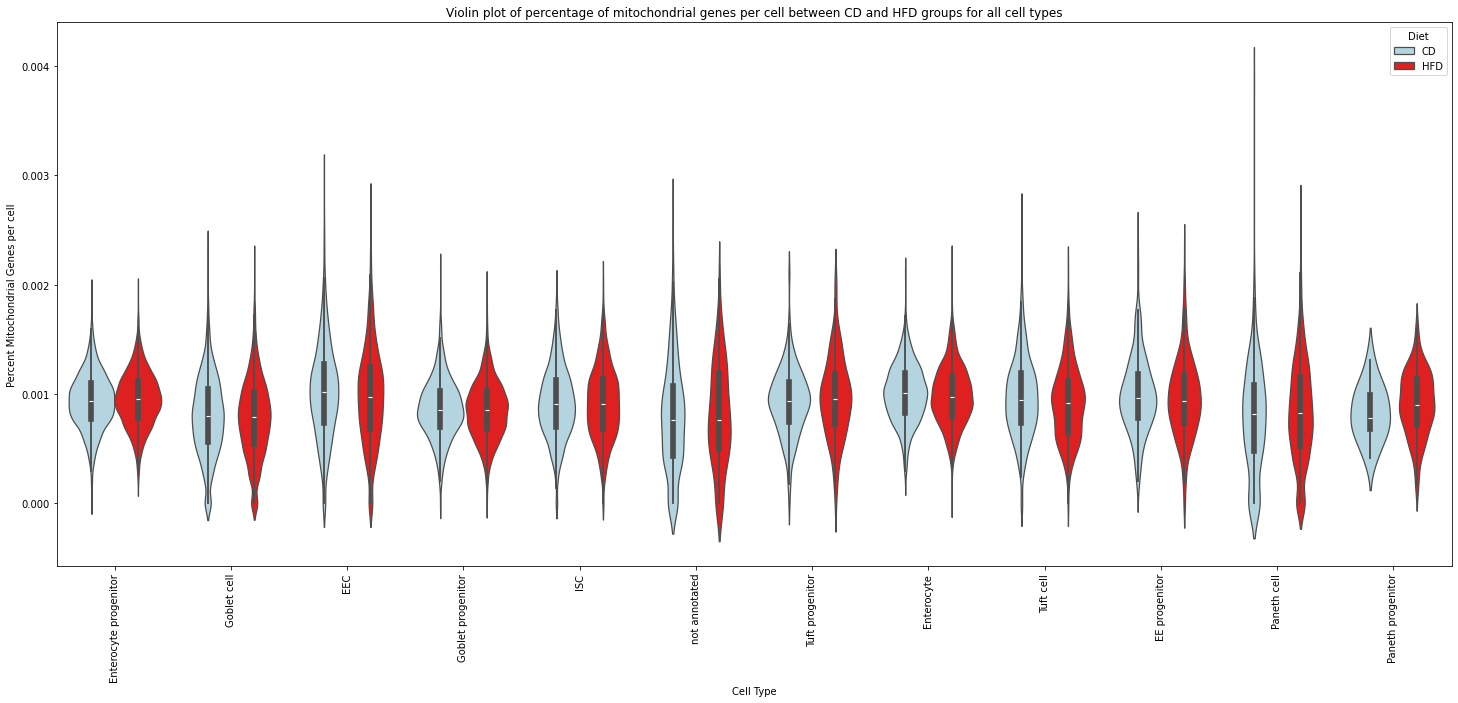

In [86]:
# Loop through each unique cell type in 'groups_named_prog4' and create a combined violin plot
unique_cell_types = adata.obs['groups_named_prog4'].unique()

# Create a combined DataFrame to hold all cell type data
combined_data = pd.DataFrame()

for cell_type in unique_cell_types:
    cell_type_indices = np.isin(adata.obs['groups_named_prog4'], [cell_type])
    cell_type_data = adata[cell_type_indices, :].copy()
    
    # Add the n_mito_genes, n_counts_2, and percent_mito_2 to the cell_type_data.obs DataFrame
    mito_genes = [name for name in adata.var_names if name.startswith('mt-')]
    mt_gene_index = np.where(mito_genes)[0]
    cell_type_data.obs['n_mito_genes'] = cell_type_data[:, mt_gene_index].X.sum(axis=1)
    cell_type_data.obs['n_counts_2'] = cell_type_data.X.sum(axis=1)
    cell_type_data.obs['percent_mito_2'] = cell_type_data[:, mt_gene_index].X.sum(axis=1) / cell_type_data.X.sum(axis=1)
    
    # Add cell type information to the DataFrame
    cell_type_data.obs['cell_type'] = cell_type
    combined_data = pd.concat([combined_data, cell_type_data.obs])

# Create a combined violin plot for percent_mito between CD and HFD groups for all cell types
plt.figure(figsize=(25, 10))  # Increased the width from 15 to 20
sns.violinplot(x='cell_type', y='percent_mito_2', hue='diet', data=combined_data, palette={'CD': 'lightblue', 'HFD': 'red'})
plt.title('Violin plot of percentage of mitochondrial genes per cell between CD and HFD groups for all cell types')
plt.xlabel('Cell Type')
plt.ylabel('Percent Mitochondrial Genes per cell')
plt.legend(title='Diet')
plt.xticks(rotation=90)
plt.show()
